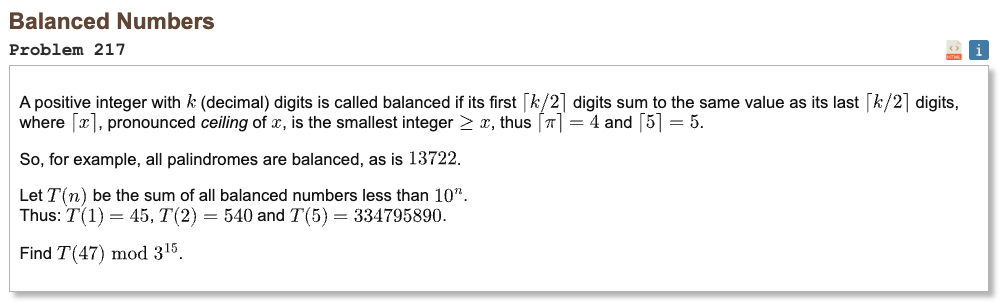

## Initial approach

* balanced means the sum of the digits on the left half equals the sum of the digits on the right half
* if the length is even, split the number into two equal parts and match their digit sums
* if the length is odd, the middle digit is counted on both sides so it cancels out, the remaining left and right sums must match
* for each length, use dp to count how many digit strings give each possible digit sum
* with the same dp, also compute the total numeric value of those digit strings
* combine left and right parts with the same digit sum, using place values (powers of 10) to get their total contribution

In [1]:
def build_dp(length, first_nonzero, mod):
    max_sum = 9 * length
    count = [0] * (max_sum + 1)
    total = [0] * (max_sum + 1)
    count[0] = 1 % mod
    total[0] = 0

    for pos in range(length):
        if pos == 0 and first_nonzero and length > 0:
            digits = range(1, 10)
        else:
            digits = range(10)

        new_count = [0] * (9 * (pos + 1) + 1)
        new_total = [0] * (9 * (pos + 1) + 1)

        for s in range(len(count)):
            c = count[s]
            if c == 0:
                continue
            t = total[s]
            for d in digits:
                ns = s + d
                new_count[ns] = (new_count[ns] + c) % mod
                new_total[ns] = (new_total[ns] + (t * 10 + c * d)) % mod

        count, total = new_count, new_total

    return count, total

def solve():
    mod = 3 ** 15
    max_k = 24

    dp_any = {}
    dp_nz = {}

    for L in range(max_k + 1):
        dp_any[L] = build_dp(L, False, mod)
        dp_nz[L] = build_dp(L, True, mod)

    total_sum = 0

    total_sum = (total_sum + 45) % mod

    for n in range(2, 48):
        if n % 2 == 0:
            k = n // 2
            left_count, left_total = dp_nz[k]
            right_count, right_total = dp_any[k]
            pow10k = pow(10, k, mod)

            acc = 0
            for s in range(9 * k + 1):
                lc = left_count[s]
                if lc:
                    acc = (acc + left_total[s] * right_count[s] * pow10k) % mod
                    acc = (acc + lc * right_total[s]) % mod
            total_sum = (total_sum + acc) % mod
        else:
            k = (n + 1) // 2
            a = k - 1
            prefix_count, prefix_total = dp_nz[a]
            suffix_count, suffix_total = dp_any[a]
            pow10k = pow(10, k, mod)
            pow10a = pow(10, a, mod)

            pair_count = 0
            base_sum = 0
            for s in range(9 * a + 1):
                pc = prefix_count[s]
                sc = suffix_count[s]
                if pc and sc:
                    pair_count = (pair_count + pc * sc) % mod
                    base_sum = (base_sum + prefix_total[s] * sc * pow10k) % mod
                    base_sum = (base_sum + pc * suffix_total[s]) % mod

            total_sum = (total_sum + (10 * base_sum + 45 * pow10a * pair_count) % mod) % mod

    return total_sum

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 6273134
CPU times: user 61 ms, sys: 1.05 ms, total: 62.1 ms
Wall time: 61.4 ms
